# Annotation: 
## Supplementary Table 2.Read raw counts. <br>
The following acronyms were used: <br>

## Experiment Designs:
V: Vialone Nano; B: Baldo; <br>
R: root; L: leaves; 

## 2 Experimental Conditions: 
T: treated (3 days salt-stressed seedlings); 
C: control (without salt stress); 
1,2,3 suffices stand for technical replicates.

In [6]:
import pandas as pd
import numpy as np
from math import *
from scipy.stats import ttest_ind, chi2_contingency
from quantile_norm import *

df = pd.read_csv('rna_data.csv', header=0, low_memory=False)
df['p_score'] = nan
#df

In [7]:
# normalization
GenIDs = df['GenID']
df = quantileNormalize(df)
df['GenID'] = GenIDs
df

,GenID,VLT1,VLT2,VLT3,VLC1,VLC2,VLC3,VRT1,VRT2,VRT3,...,BLC1,BLC2,BLC3,BRT1,BRT2,BRT3,BRC1,BRC2,BRC3,p_score
0,Os01g14960,21.458333,11.041667,9.041667,10.875000,30.083333,38.166667,32.083333,42.458333,38.500000,...,30.916667,48.500000,19.166667,39.916667,46.333333,90.875000,73.916667,67.083333,57.125000,0.0
1,Os01g58020,0.416667,8.083333,7.458333,3.458333,11.291667,10.041667,0.000000,0.000000,0.000000,...,4.958333,6.250000,4.458333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,Os01g02890,2.833333,6.708333,9.041667,23.333333,22.791667,17.125000,622.625000,659.500000,754.500000,...,105.583333,86.083333,97.250000,747.416667,723.625000,553.458333,518.708333,623.125000,798.000000,0.0
3,Os01g06670,0.000000,17.166667,1.875000,3.458333,9.541667,0.916667,0.000000,0.000000,0.000000,...,11.166667,6.250000,0.958333,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.0
4,Os01g10040,293.250000,247.375000,225.958333,289.791667,305.000000,279.333333,129.500000,101.333333,116.250000,...,410.708333,416.750000,310.333333,97.125000,118.333333,143.375000,245.791667,172.791667,217.041667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55796,Os12g44310,7722.208333,8775.750000,9139.083333,10177.541667,9474.625000,9779.250000,1746.791667,1567.250000,1699.458333,...,8394.208333,7911.083333,7845.958333,1312.708333,1393.583333,1127.958333,1356.291667,1364.250000,1275.666667,0.0
55797,Os12g44330,2640.833333,2033.541667,2354.875000,2077.000000,1868.083333,1913.833333,2927.000000,2639.583333,3164.250000,...,2127.166667,1939.666667,2230.750000,2642.166667,2763.416667,2336.666667,2267.000000,2349.458333,2397.416667,0.0
55798,Os12g44340,327.291667,347.083333,390.208333,344.041667,253.916667,272.000000,1200.041667,1115.500000,1276.250000,...,292.500000,304.916667,248.833333,1471.000000,1321.333333,1055.125000,1111.000000,1274.583333,1512.083333,0.0
55799,Os12g44370,1466.875000,1181.125000,1076.083333,1604.541667,2017.250000,2229.166667,206.291667,286.041667,158.875000,...,1924.625000,2558.583333,2127.875000,173.875000,174.208333,258.791667,239.250000,141.166667,111.833333,0.0


In [8]:
# Vialone Nano - Leaf 
data_set1 = df[['VLT1','VLT2','VLT3']].to_numpy()
data_set2 = df[['VLC1','VLC2','VLC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_score'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df[df['p_score'] < 0.01]
df = df.dropna()
#df

In [9]:
# Vialone Nano - Root 
data_set1 = df[['VRT1','VRT2','VRT3']].to_numpy()
data_set2 = df[['VRC1','VRC2','VRC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_score'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df[df['p_score'] < 0.01]
df = df.dropna()
#df

In [10]:
# Baldo - Leaf 
data_set1 = df[['BLT1','BLT2','BLT3']].to_numpy()
data_set2 = df[['BLC1','BLC2','BLC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_score'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df[df['p_score'] < 0.01]
df = df.dropna()
#df

In [11]:
# Baldo - Root 
data_set1 = df[['BRT1','BRT2','BRT3']].to_numpy()
data_set2 = df[['BRC1','BRC2','BRC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_score'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df[df['p_score'] < 0.01]
df = df.dropna()

In [12]:
# Finding folds:
df['VL_fold'] = np.log2(df[['VLT1','VLT2','VLT3']].mean(axis=1) / df[['VLC1','VLC2','VLC3']].mean(axis=1))
df['VR_fold'] = np.log2(df[['VRT1','VRT2','VRT3']].mean(axis=1) / df[['VRC1','VRC2','VRC3']].mean(axis=1))
df['BL_fold'] = np.log2(df[['BLT1','BLT2','BLT3']].mean(axis=1) / df[['BLC1','BLC2','BLC3']].mean(axis=1))
df['BR_fold'] = np.log2(df[['BRT1','BRT2','BRT3']].mean(axis=1) / df[['BRC1','BRC2','BRC3']].mean(axis=1))

df = df[['GenID','VL_fold','VR_fold','BL_fold','BR_fold']]
df = df.set_index('GenID')
df


C:\Users\DHRUBO\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,VL_fold,VR_fold,BL_fold,BR_fold
GenID,,,,
Os01g32830,-1.147518,-0.163190,-0.559651,-2.010487
Os01g33684,0.594861,0.706702,0.014849,0.412970
Os01g35160,0.765891,0.623068,0.514615,0.265362
Os01g36080,-0.300588,-0.400637,-0.500647,-0.242315
Os01g36240,1.988618,0.468218,1.345454,0.224168
...,...,...,...,...
Os12g44020,-0.824708,-1.150729,-1.036947,-0.520907
Os12g44040,-0.605474,0.119227,-0.444741,0.325190
Os12g44060,-0.651270,-0.946911,-0.864899,-0.484741


<AxesSubplot:ylabel='GenID'>

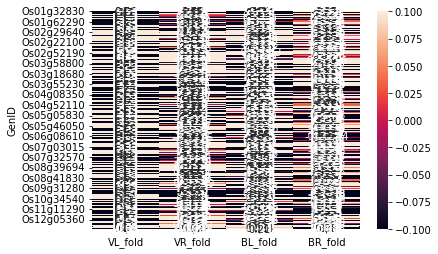

In [13]:
# heatmap to show the fold change in differentially expressed genes. 
import seaborn as sns
sns.heatmap(df, annot=True)